# Neural Networks and Deep Learning with PyTorch

Full Course Syllabus: http://deeplizard.com/learn/video/v5cngxo4mIg

# Part 2: CNN Fashion MNIST Image Classification Project

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from resources.plotcm import plot_confusion_matrix

# Section 1: Data and Data Processing

Importance of Data in Deep Learning - http://deeplizard.com/learn/video/EqpzfvxBx30  
Extract, Transform, Load (ETL) - http://deeplizard.com/learn/video/8n-TGaBZnk4  
PyTorch Datasets and DataLoaders - http://deeplizard.com/learn/video/mUueSPmcOBc  

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)

# Section 2: Neural Networks and PyTorch Design

Build PyTorch CNN - http://deeplizard.com/learn/video/k4jY9L8H89U  
CNN Layers - http://deeplizard.com/learn/video/IKOHHItzukk  
CNN Weights - http://deeplizard.com/learn/video/stWU37L91Yc  
Callable Neural Networks - http://deeplizard.com/learn/video/rcc86nXKwkw  
CNN Forward Method - http://deeplizard.com/learn/video/MasG7tZj-hw  

In [3]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

In [4]:
network = Network()

# Section 3: Training Neural Networks

In [5]:
optimizer = optim.Adam(network.parameters(), lr=0.001) # Optimizer

In [6]:
# The training loop
for epoch in range(1):
    total_correct = 0
    total_loss = 0
    for batch in train_loader:
        images, labels = batch
        
        optimizer.zero_grad()
        preds = network(images)
        
        loss = F.cross_entropy(preds, labels)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()

    print('epoch:', epoch, "total_correct:", total_correct, "loss:", total_loss)

epoch: 0 total_correct: 27754 loss: 90.4859026670456


In [7]:
# Function to get all predictions at once
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [8]:
# Analytics
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
train_preds = get_all_preds(network, prediction_loader)
preds_correct = train_preds.argmax(dim=1).eq(train_set.targets).sum().item()

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 40209
accuracy: 0.67015


Confusion matrix, without normalization
[[3931  290  352 1088   16   10  156    1  146   10]
 [  96 5378  121  389   11    1    2    0    1    1]
 [ 116   29 5014   90  185    5   59    2  498    2]
 [ 313  471  181 4845   76    1   77    0   36    0]
 [ 223   45 4260  656  606    5   45    0  159    1]
 [   0    2    4   30    0 4866    0  689   58  351]
 [1076   62 3544  583   63   15  142    0  510    5]
 [   0    0    0    0    0  822    0 4489   12  677]
 [  16    8  420   76    4   81   13   14 5356   12]
 [   0    0    0   17    0  133    0  258   10 5582]]


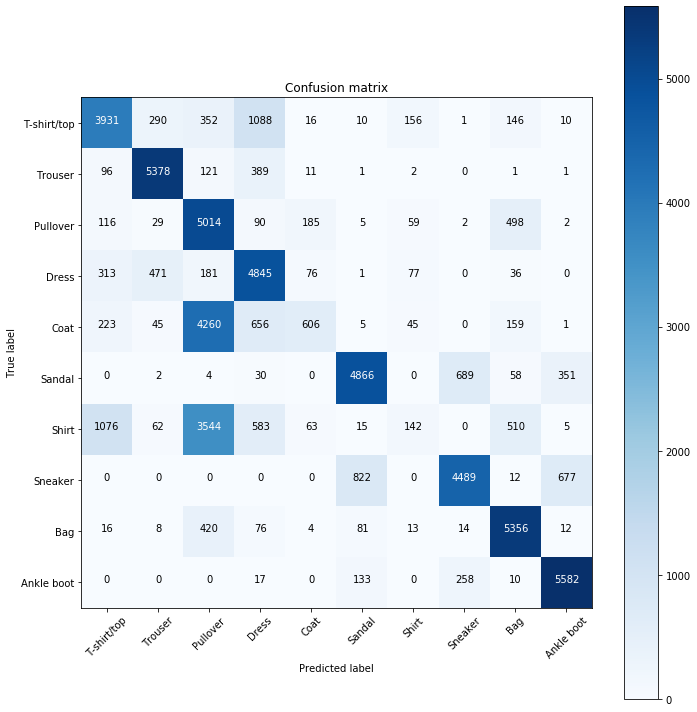

In [9]:
# Graphical analytics
cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
names = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, names)